## Welcome to the SolPOC Notebook !
### In a way to pick up the software, we propose you to learn and test the key features in a way to be familiar with the software before usage.<br>

# Chapter 6 : The optimization

Now that you're familiar with the evaluate methods, let's see one of the best features of SolPOC : the optimization. If you want to test a problem and know which solution is the best, SolPOC has different methods in a way to find the best way to answer a problem. They are quite a lot so we let you refer to the User Guide and the functions_COPS.py file to know the difference between them. We just advise you to learn this differences because each algorithm need specific parameters.

In a way to understand the role of the Optimization, let's take an example. Let's evaluate the solar absorptivity of a stack and change the thicknesses in a way to find the better solar transmissivity :

In [106]:
run functions_COPS.py

In [17]:
evaluate = evaluate_T_s
Mat_Stack = ['BK7', 'TiO2', 'SiO2']
d_Stack = [1000000, 50, 150]
Wl = np.arange(280, 2505, 5)
n_Stack, k_Stack = Made_Stack(Mat_Stack, Wl)
Wl_Sol, Sol_Spec, name_Sol_Spec = open_SolSpec('Materials/SolSpec.txt','GT')
Sol_Spec = np.interp(Wl, Wl_Sol, Sol_Spec)
Ang = 0
parameters = ({
    'Mat_Stack' : Mat_Stack,
    'd_Stack' : d_Stack,
    'Wl' : Wl,
    'n_Stack' : n_Stack,
    'k_Stack' : k_Stack,
    'Sol_Spec' : Sol_Spec,
    'Ang' : Ang,})
print('result = ', evaluate(d_Stack, parameters))

result =  0.8127566934377729


This result is good but maybe not the best we can find, let's try to increase the TiO2's thickness :

In [18]:
d_Stack = [1000000, 100, 150]
parameters.update({
    'd_Stack' : d_Stack})
print('result = ', evaluate(d_Stack, parameters))

result =  0.8353540807919196


It seems to be better, let's try to decrease the SiO2's thickness so :

In [19]:
d_Stack = [1000000, 100, 100]
parameters.update({
    'd_Stack' : d_Stack})
print('result = ', evaluate(d_Stack, parameters))

result =  0.8599832866848345


We can see that the best result is for d_Stack = [1000000, 100, 100]. But we aren't very precise, if we want to find the best solution, we have to test multiple combinaisons. That's what optimization algorithms are made for. Let's try to find the best solution for this problem using an optimiztion method.

To use optimization algorithms we need to initilaize a lot of parameters, first we put the same as the example :

In [20]:
Mat_Stack = ['BK7', 'TiO2', 'SiO2']
Wl = np.arange(280, 2505, 5)
Wl_Sol , Sol_Spec , name_Sol_Spec = open_SolSpec('Materials/SolSpec.txt','GT')
Sol_Spec = np.interp(Wl, Wl_Sol, Sol_Spec)
n_Stack, k_Stack = Made_Stack(Mat_Stack, Wl)
Ang = 0

Then we have to choose an optimization algorithm. At this moment, we recommand you to use Differencial Evolution, directly implemented in SolPOC in DEvol function. Similarly to evaluate methods, we can use a callable.

In [21]:
algo = DEvol

The selection variable is made for saying to the algorithm that we want him to consider the maximum solution or the minimum. Here, we want to maximize the evaluate function.

In [49]:
selection = selection_max

evaluate is for choosing an evaluate method (like in chapter 5). Here, we stay on the example of evaluate_T_s.

In [50]:
evaluate = evaluate_T_s

Th_Substrate is for setting the thickness of the substrate, we stay on the same example of 1 million nm (1 mm).

In [51]:
Th_Substrate = 1e6

Th_range is for setting an interval of thicknesses for the generation of stacks. It should depend on your possibilities regarding the capacity of making the stack in real life.

In [52]:
Th_range = (0, 200)

In [53]:
pop_size = 10
mutation_rate = 0.5
nb_generation = 10
mutation_DE = "current_to_best"
f1, f2 = 0.9, 0.8

These are parameters regarding the DEvol algorithm.

In [54]:
parameters = ({
    'Mat_Stack' : Mat_Stack,
    'algo' : algo,
    'selection' : selection,
    'evaluate' : evaluate,
    'Wl' : Wl,
    'Th_Substrate' : Th_Substrate,
    'Th_range' : Th_range,
    'Ang' : Ang,
    'pop_size' : pop_size,
    'mutation_rate' : mutation_rate,
    'nb_generation' : nb_generation,
    'n_Stack' : n_Stack,
    'k_Stack' : k_Stack,
    'Sol_Spec' : Sol_Spec,
    'mutation_DE' : mutation_DE,
    'f1' : f1,
    'f2' : f2,})

Then, we have special parameters to add just for DEvol :

Now, let's see what's the best solution. For that, we launch the function that we already put into algo with 3 parameters : evaluate, selection and the parameters dictionary.

In [56]:
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('result = ', evaluate(best_solution,parameters))

d_Stack =  [1.00000000e+06 2.26323789e+00 1.03703491e+02]
result =  0.9635631146598967


We got here the higher T_s possible with this Stack of materials with a possible range of 0 to 200 nm. result contains the evaluate value. d_Stack contains the thicknesses of each layer.

We could want to minimize R_s instead of maximize T_s :

In [80]:
evaluate = evaluate_R_s
selection = selection_min
parameters.update({
    'evaluate' : evaluate,
    'selection' : selection,})
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('result = ', evaluate(best_solution,parameters))

d_Stack =  [1.00000000e+06 6.97306576e+00 2.78107314e+00]
result =  0.06560103641817991


Here, we got the lowest solar Reflectance possible.

In [81]:
R_s = evaluate_R_s(best_solution,parameters)
T_s = evaluate_T_s(best_solution,parameters)
A_s = evaluate_A_s(best_solution,parameters)
print('R_s : ', R_s, 'A_s : ', A_s, 'T_s : ', T_s)
print('total :', R_s+T_s+A_s)

R_s :  0.06560103641817991 A_s :  0.0026547224246585674 T_s :  0.9317442411571616
total : 1.0


We can observe that the T_s is the same T_s value that we previously into the cell [56].

As it said before, we can increase the optimization quality. The parameters are optimization method depending. As example, for DE, let's try to increase the size of the population. Let's see with 2 different values of pop_size. <br>
For that, we will use the random.seed() method that allows us to use same random numbers for multiple operations and put the same random numbers in both simulation. If you want to be familiar with, you can try to execute this cell multiple times :

In [82]:
import numpy as np
np.random.seed(15)
for i in range(4):
    print(np.random.randint(1, 10))

9
6
6
8


Even if we have a random number, you should have the following values in this order : 9 6 6 8. It's just because we fixed the seed value ! It allows us to compare more precisely the effect of changing the population size.

In [83]:
seed = 50
pop_size = 10
nb_generation = 2
evaluate = evaluate_T_s
selection = selection_max
parameters.update({
    'pop_size' : pop_size,
    'nb_generation' : nb_generation,
    'seed' : seed,
    'evaluate' : evaluate,
    'selection' : selection,})
#running optimization process
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('T_s = ', evaluate(best_solution,parameters))
#update the new pop_size
pop_size = 30
parameters.update({
    'pop_size' : pop_size,})
#running optimization process
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('T_s = ', evaluate(best_solution,parameters))

d_Stack =  [1.00000000e+06 1.04517382e+01 6.54114608e+01]
T_s =  0.9152963221904474
d_Stack =  [1.00000000e+06 6.97306576e+00 2.78107314e+00]
T_s =  0.9317442411571616


Here, the program generated more cases (30 instead of 10) and the probability of having better ones was lower.

Let's do the same with nb_generation :

In [89]:
nb_generation = 3
parameters.update({
    'nb_generation' : nb_generation,})
#running optimization process
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('T_s = ', evaluate(best_solution,parameters))
#update the new nb_generation
nb_generation = 8
parameters.update({
    'nb_generation' : nb_generation,})
#running optimization process
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('T_s = ', evaluate(best_solution,parameters))

d_Stack =  [1.00000000e+06 3.60717166e+00 8.12840487e+01]
T_s =  0.9557481046421298
d_Stack =  [1.00000000e+06 1.18819712e+00 1.15853495e+02]
T_s =  0.9639208207593507


In [92]:
nb_generation = 10
parameters.update({
    'nb_generation' : nb_generation,})
#running optimization process
best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
print('d_Stack = ', best_solution)
print('T_s = ', evaluate(best_solution,parameters))

d_Stack =  [1.00000000e+06 1.18819712e+00 1.15853495e+02]
T_s =  0.9639208207593507


It's possible to study the convergence of an optimization method using the values presents into the variable dev. See the User guide for more details.

With enough number of generation, the optimization method indentified the maximum value. The suppose the optimum global and the problem solved.

To ensure that the previous result is really a global optimum, we need to repeat the optimization method from different starting points meaning a different seed value. Read the User Guide and the academic paper on the section called 'Regularity as optimality indicator' and the 'consistency curves'.

In [108]:
try:
    del parameters['seed']
except:
    print('seed not in parameters')
pop_size = 30
parameters.update({
    'pop_size' : pop_size,})
tab_perf = []
for i in range(10):
    best_solution, dev, n_iter, seed = algo(evaluate, selection, parameters)
    tab_perf.append(evaluate(best_solution,parameters))
    print('Launch ', i+1, ' : ', "{:.5f}".format(evaluate(best_solution,parameters)))

seed not in parameters
Launch  1  :  0.96431
Launch  2  :  0.96204
Launch  3  :  0.96179
Launch  4  :  0.96351
Launch  5  :  0.96424
Launch  6  :  0.96022
Launch  7  :  0.96120
Launch  8  :  0.96420
Launch  9  :  0.96359
Launch  10  :  0.96416


We find a better value that previously ! You should observe 1 or 2 values close from 0.9642X. The previous value of 0.9639 is not a global optimum and replay the optimization method several times is always a good idea.

We can see that the different results are close. But in a way to avoid printing results everytime to see the differences, we can show on a graph the consistency of the results. For that we can call a function by adding some dedicated parameters :

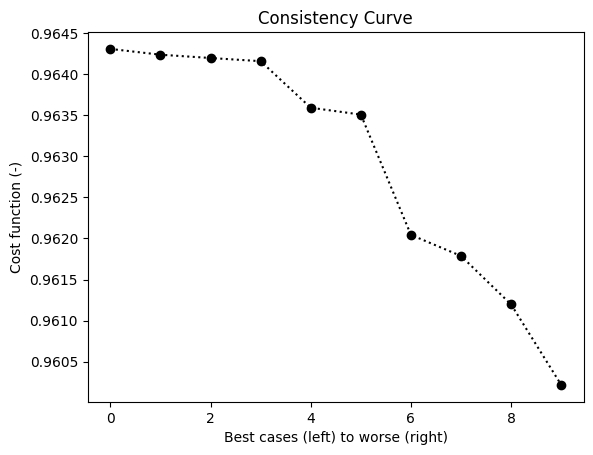

In [109]:
from datetime import datetime
Experience_results = ({
    'tab_perf' : tab_perf,})
date_time = datetime.now().strftime("%Y-%m-%d-%Hh%M")
directory = date_time
if not os.path.exists(directory):
        os.makedirs(directory)
Consistency_curve_plot(parameters, Experience_results, directory)

The consistency curve show the ability of the optimization method to find the same optimum several times. Ideally, the values are close to each other. As the consistency curve sorts the values, we are looking for a group of identical values to the left of the graph. If some identical or close values are identified several times, that brings the confidence that we have in the results high. The maximum value should be 0.9643.

To end with optimization methods, we precise that each case generated in the population is called as an individual here and that's why in the previous chapter we put individual as the name of the d_Stack, it's because individual represent the best solution given by the optimization algorithms. The name of this variable is more an IT name than a physics one.

[Chapter 7](SolPOC_Chapter_7.ipynb)